In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pymodulon.core import IcaData
from pymodulon import example_data
from pymodulon.io import save_to_json, load_json_model
from pymodulon.enrichment import *
import plotly.express as px
#from pymodulon.plotting import *
from matplotlib.ticker import MaxNLocator
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from itertools import combinations
from scipy.stats import spearmanr, pearsonr
import seaborn as sns

In [2]:
ica_data = load_json_model('../data/yarrowia2025_fixed.json')

In [4]:
o2_projects = ['O2_oscillation_0.05', 'O2_oscillation_0.2', 'O2_oscillation_0.1']

o2_samples = ica_data.sample_table[ica_data.sample_table['project'].isin(o2_projects)].copy(deep=False)

o2_samples

,File name,condition,project,reference_condition,Strain,Mode of operation,Media,Limitation,C-source,Growth rate,DO,pH,Temperature,Read1,Read2
yl_001,PD019 A1 S02 #1,µ0.05_DO50,O2_oscillation_0.05,µ0.05_DO10,W29,Continuous,Delft,Carbon,Glucose,0.05,50,6,30,ylipolytic2025_repeat/PD019A1S021A_1.fq.gz,ylipolytic2025_repeat/PD019A1S021A_2.fq.gz
yl_002,PD019 A1 S02 #2,µ0.05_DO50,O2_oscillation_0.05,µ0.05_DO10,W29,Continuous,Delft,Carbon,Glucose,0.05,50,6,30,ylipolytic2025_repeat/PD019A1S022A_1.fq.gz,ylipolytic2025_repeat/PD019A1S022A_2.fq.gz
yl_003,PD019 A1 S03 #2,µ0.05_DO25,O2_oscillation_0.05,µ0.05_DO10,W29,Continuous,Delft,Carbon,Glucose,0.05,25,6,30,ylipolytic2025_repeat/PD019A1S032A_1.fq.gz,ylipolytic2025_repeat/PD019A1S032A_2.fq.gz
yl_004,PD019 A1 S03 #1,µ0.05_DO25,O2_oscillation_0.05,µ0.05_DO10,W29,Continuous,Delft,Carbon,Glucose,0.05,25,6,30,ylipolytic2025_repeat/PD019A1S031A_1.fq.gz,ylipolytic2025_repeat/PD019A1S031A_2.fq.gz
yl_005,PD019 A1 S04 #1,µ0.05_DO10,O2_oscillation_0.05,µ0.05_DO10,W29,Continuous,Delft,Carbon,Glucose,0.05,10,6,30,ylipolytic2025_repeat/PD019A1S041A_1.fq.gz,ylipolytic2025_repeat/PD019A1S041A_2.fq.gz
yl_006,PD019 A1 S04 #2,µ0.05_DO10,O2_oscillation_0.05,µ0.05_DO10,W29,Continuous,Delft,Carbon,Glucose,0.05,10,6,30,ylipolytic2025_repeat/PD019A1S042A_1.fq.gz,ylipolytic2025_repeat/PD019A1S042A_2.fq.gz
yl_007,PD019 A1 S05 #1,µ0.05_DO5,O2_oscillation_0.05,µ0.05_DO10,W29,Continuous,Delft,Carbon,Glucose,0.05,5,6,30,ylipolytic2025_repeat/PD019A1S051A_1.fq.gz,ylipolytic2025_repeat/PD019A1S051A_2.fq.gz
yl_008,PD019 A1 S05 #2,µ0.05_DO5,O2_oscillation_0.05,µ0.05_DO10,W29,Continuous,Delft,Carbon,Glucose,0.05,5,6,30,ylipolytic2025_repeat/PD019A1S052A_1.fq.gz,ylipolytic2025_repeat/PD019A1S052A_2.fq.gz
yl_009,PD019 A1 S06 #1,µ0.05_DO2.5,O2_oscillation_0.05,µ0.05_DO10,W29,Continuous,Delft,Carbon,Glucose,0.05,2.5,6,30,ylipolytic2025_repeat/PD019A1S061A_1.fq.gz,ylipolytic2025_repeat/PD019A1S061A_2.fq.gz
yl_010,PD019 A1 S06 #2,µ0.05_DO2.5,O2_oscillation_0.05,µ0.05_DO10,W29,Continuous,Delft,Carbon,Glucose,0.05,2.5,6,30,ylipolytic2025_repeat/PD019A1S062A_1.fq.gz,ylipolytic2025_repeat/PD019A1S062A_2.fq.gz


In [5]:
ica_data.sample_table.to_csv('sample_table_to_fix.csv')


In [18]:
def pca_scatter3(df, labels=None, scale=True, label_points=False,name='pca_plot',
                 palette='tab10', figsize=(12, 4), s=45, alpha=0.9):
    """
    PCA on a genes × samples table with a 3‑panel pairwise plot (PC1‑PC3).

    Parameters
    ----------
    df : pandas.DataFrame
        Rows = genes/features, Columns = samples/conditions.
    labels : list‑like or pandas.Series, optional
        A list/category for each column (same length/order as df.columns).
        • If `label_points` is False (default) they are used for *colours*.
        • If `label_points` is True they are drawn as *text* at each point.
    scale : bool, default True
        Standard‑scale each gene before PCA (zero mean, unit variance).
    label_points : bool, default False
        If True, annotate each point with the corresponding entry in `labels`.
        If False, unique entries in labels are mapped to colours with a legend.
    palette : str or sequence
        Matplotlib colour palette name or explicit colour list.
    figsize : tuple, default (12, 4)
        Overall figure size (three equal‑width panels).
    s : int or float, default 45
        Marker size for scatter points.
    alpha : float, default 0.9
        Marker transparency.

    Returns
    -------
    pca : sklearn.decomposition.PCA
        The fitted PCA object (for further inspection if needed).
    """
    # ---------- 1. prepare the data (samples as rows) ----------
    X = df.T.values                                       # (n_samples, n_genes)
    if scale:
        X = StandardScaler().fit_transform(X)

    # ---------- 2. run PCA ----------
    pca = PCA(n_components=3, random_state=0)
    PCs = pca.fit_transform(X)                            # shape = (n_samples, 3)
    expl = pca.explained_variance_ratio_ * 100            # %

    # ---------- 3. reporting ----------
    print("Variance explained: "
          f"PC1 = {expl[0]:.1f} %,  PC2 = {expl[1]:.1f} %,  PC3 = {expl[2]:.1f} %")

    # ---------- 4. figure set‑up ----------
    fig, axes = plt.subplots(1, 3, figsize=figsize, sharex=False, sharey=False)

    # colours / text for each point
    if labels is None:
        labels = np.repeat('', len(df.columns))           # blank labels
    labels = pd.Series(labels, index=df.columns)

    if label_points:
        colour_map = np.full(len(labels), 'tab:blue')     # one colour, text only
    else:
        uniq = labels.unique()
        palette = plt.get_cmap(palette).colors if isinstance(palette, str) else palette
        colour_map = labels.apply(lambda z: palette[list(uniq).index(z) % len(palette)])

    # ---------- 5. scatter on PC pairs ----------
    axes_pairs = [(0, 1), (0, 2), (1, 2)]
    for ax, (i, j) in zip(axes, axes_pairs):
        ax.scatter(PCs[:, i], PCs[:, j], c=colour_map, s=s, alpha=alpha, edgecolor='k')
        ax.set_xlabel(f"PC{i+1} ({expl[i]:.1f} %)")
        ax.set_ylabel(f"PC{j+1} ({expl[j]:.1f} %)")
        ax.xaxis.set_major_locator(MaxNLocator(5))
        ax.yaxis.set_major_locator(MaxNLocator(5))
        ax.axhline(0, color='grey', lw=0.6)
        ax.axvline(0, color='grey', lw=0.6)

        if label_points:
            for (x, y), txt in zip(PCs[:, [i, j]], labels):
                ax.text(x, y, str(txt), fontsize=8,
                        ha='center', va='center',
                        bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="none", alpha=0.7))

    # common legend (colour‑based) if not text labelling
    if not label_points and labels.nunique() > 0:
        handles = [plt.Line2D([0], [0], marker='o', color='w',
                              markerfacecolor=palette[k % len(palette)],
                              markeredgecolor='k', markersize=np.sqrt(s))
                   for k, _ in enumerate(labels.unique())]
        axes[-1].legend(handles, labels.unique(), frameon=False,
                        bbox_to_anchor=(1.02, 1), loc='upper left')

    plt.tight_layout()
    #plt.savefig(name+'.png',dpi=300,transparent=True)
    return pca

Overall variance analysis (Major variance comes from 0.005 hr-1 growth rate samples)

Variance explained: PC1 = 31.7 %,  PC2 = 23.5 %,  PC3 = 12.7 %


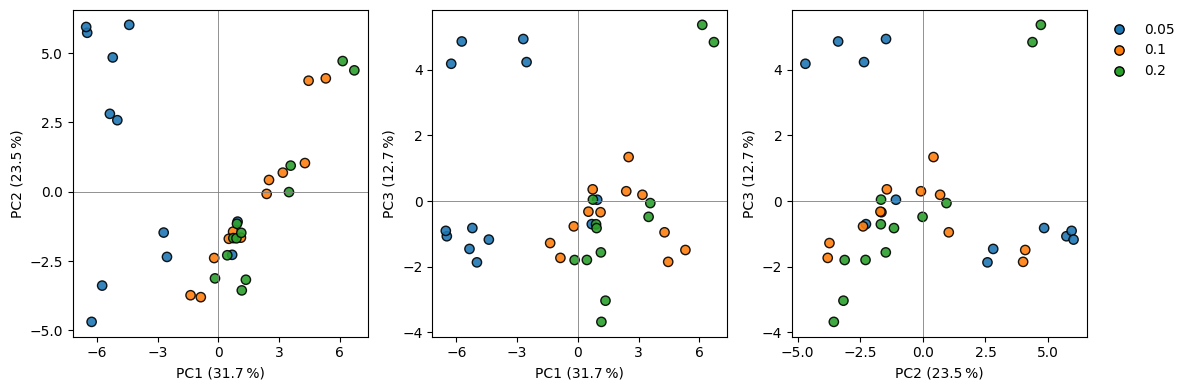

In [19]:
pca_model = pca_scatter3(ica_data.A[o2_samples.index], labels=o2_samples['Growth rate'].tolist(), scale=True, label_points=False,name='tpm_pca')


Variance explained: PC1 = 31.7 %,  PC2 = 23.5 %,  PC3 = 12.7 %


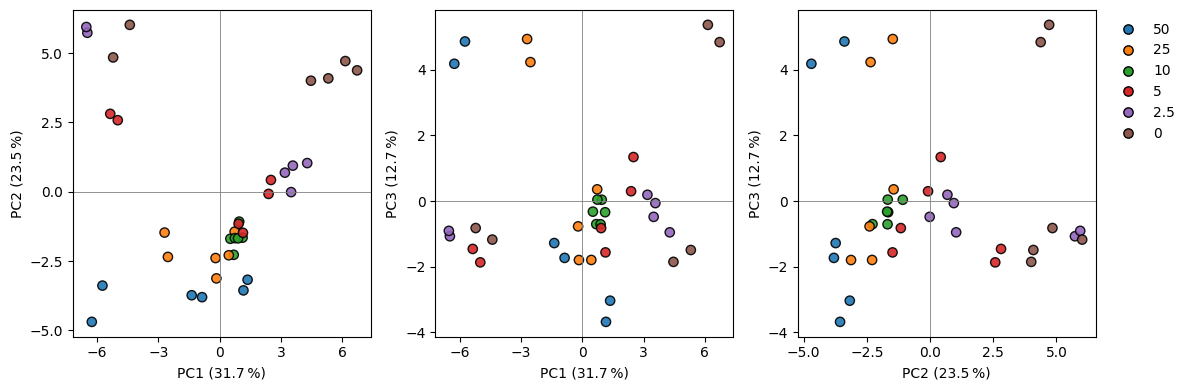

In [20]:
pca_model = pca_scatter3(ica_data.A[o2_samples.index], labels=o2_samples['DO'].tolist(), scale=True, label_points=False,name='tpm_pca')


O2 related variance analysis

0.05 hr-1

Variance explained: PC1 = 41.7 %,  PC2 = 24.2 %,  PC3 = 13.3 %


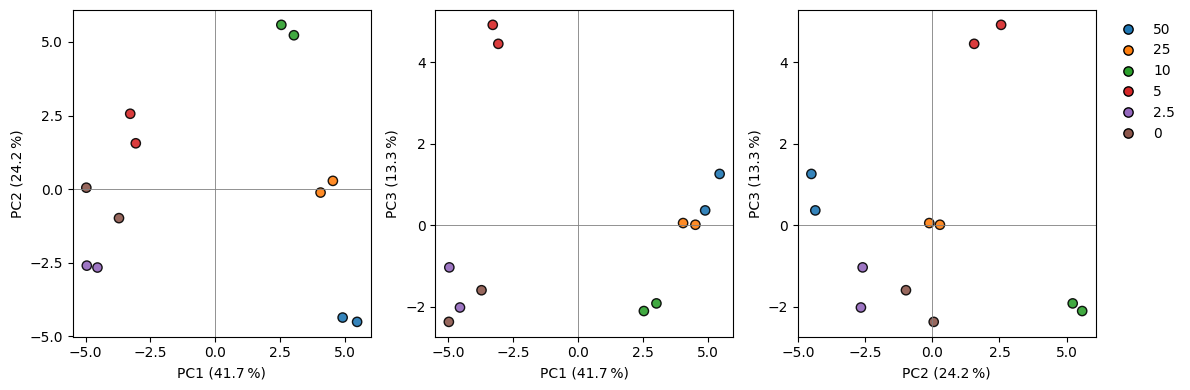

In [21]:
low_GR_samples = ica_data.sample_table[ica_data.sample_table['project']=='O2_oscillation_0.05'].copy(deep=False)

pca_model = pca_scatter3(ica_data.A[low_GR_samples.index], labels=low_GR_samples['DO'].tolist(), scale=True, label_points=False,name='tpm_pca')


0.1 hr-1

Variance explained: PC1 = 49.5 %,  PC2 = 24.2 %,  PC3 = 9.3 %


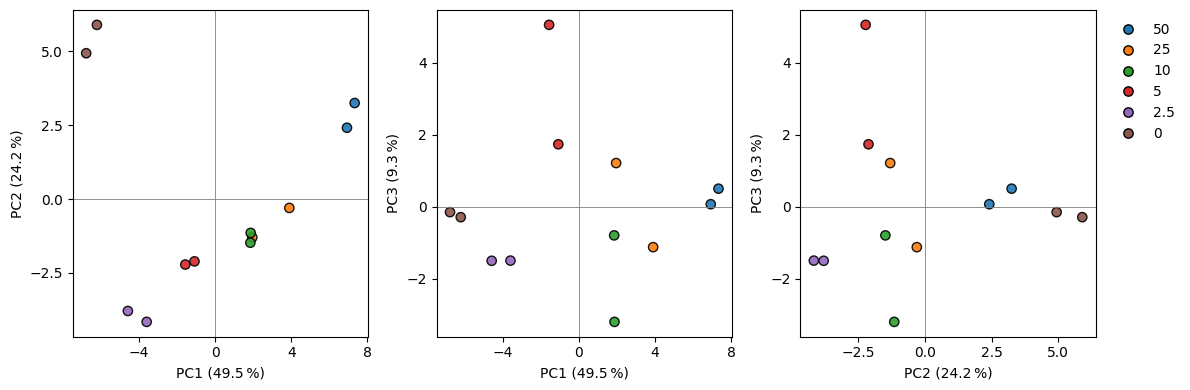

In [22]:
med_GR_samples = ica_data.sample_table[ica_data.sample_table['project']=='O2_oscillation_0.1'].copy(deep=False)

pca_model = pca_scatter3(ica_data.A[med_GR_samples.index], labels=med_GR_samples['DO'].tolist(), scale=True, label_points=False,name='tpm_pca')


0.2 hr-1

Variance explained: PC1 = 62.2 %,  PC2 = 14.3 %,  PC3 = 10.6 %


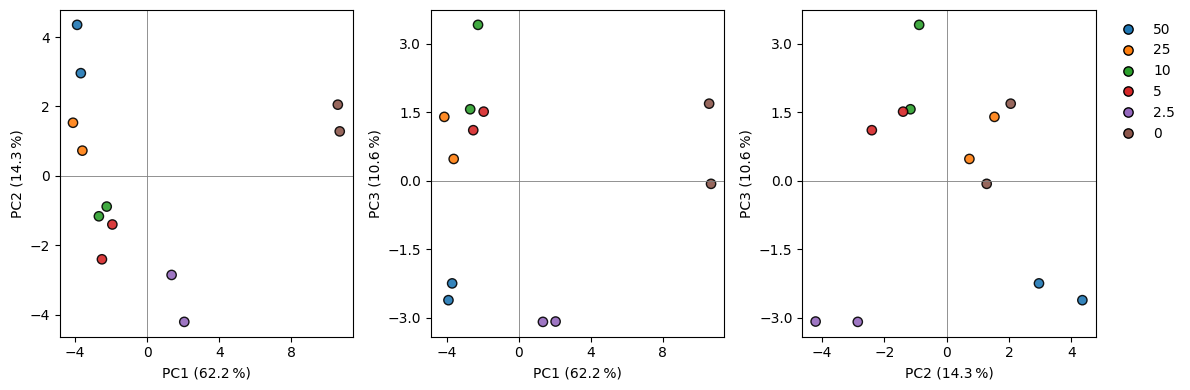

In [23]:
high_GR_samples = ica_data.sample_table[ica_data.sample_table['project']=='O2_oscillation_0.2'].copy(deep=False)

pca_model = pca_scatter3(ica_data.A[high_GR_samples.index], labels=high_GR_samples['DO'].tolist(), scale=True, label_points=False,name='tpm_pca')


In [24]:
## correlating DO 

In [37]:
low_do_samples = ica_data.sample_table[(ica_data.sample_table['project']=='O2_oscillation_0.2')]
low_do = low_do_samples['DO'].tolist()

do_df = pd.DataFrame({'DO': low_do}, index=ica_data.A[low_do_samples.index].columns)
df_merged = ica_data.A[low_do_samples.index].T.join(do_df)
low_do_df = df_merged.groupby('DO').mean().T


low_do_df = low_do_df[['0','2.5','5','50']]

In [38]:
# Compute Spearman correlation for each row
do_correlations = []
do_pvalues = []

for idx, row in low_do_df.iterrows():
    corr, pval = spearmanr(row.values, row.index.tolist())
    do_correlations.append(corr)
    do_pvalues.append(pval)

do_corr_df = pd.DataFrame({
    'iModulon': low_do_df .index,
    'Spearman_corr': do_correlations,
    'p_value': do_pvalues
})


do_corr_df = do_corr_df.sort_values(by='Spearman_corr', ascending=False).reset_index(drop=True)


In [39]:
do_corr_df

,iModulon,Spearman_corr,p_value
0,18,1.0,0.0
1,12,0.8,0.2
2,35,0.8,0.2
3,28,0.8,0.2
4,17,0.8,0.2
5,21,0.4,0.6
6,5,0.4,0.6
7,16,0.2,0.8
8,8,0.2,0.8
9,30,0.2,0.8


In [47]:
ica_data.view_imodulon(0)[abs(ica_data.view_imodulon(0)['gene_weight'])>0.1]

,gene_weight,accession,source,feature,start,end,score,strand,phase,attributes,...,sacc_gene_product,COG_category,Description,Preferred_name,GOs,PFAMs,KEGG_Pathway,KEGG_Module,BRITE,regulator
YALI1_A12540g,0.133794,NC_090770.1,RefSeq,CDS,1254065.0,1255171.0,.,+,0,ID=cds-XP_500012.2;Parent=rna-XM_500012.3;Dbxr...,...,NaN,C,Catalyzes the NAD( )-dependent oxidation of fo...,FDH1,"GO:0003674,GO:0003824,GO:0005575,GO:0005576,GO...","2-Hacid_dh,2-Hacid_dh_C","ko00630,ko00680,ko01100,ko01120,ko01200,map006...",-,"ko00000,ko00001,ko01000",NaN
YALI1_B26033g,0.200090,NC_090771.1,RefSeq,CDS,2602206.0,2603321.0,.,-,0,ID=cds-XP_501117.3;Parent=rna-XM_501117.3;Dbxr...,...,NaN,C,Catalyzes the NAD( )-dependent oxidation of fo...,FDH1,"GO:0003674,GO:0003824,GO:0005575,GO:0005576,GO...","2-Hacid_dh,2-Hacid_dh_C","ko00630,ko00680,ko01100,ko01120,ko01200,map006...",-,"ko00000,ko00001,ko01000",NaN
YALI1_C10762g,0.146509,NC_090772.1,RefSeq,CDS,1075184.0,1076290.0,.,-,0,ID=cds-XP_501582.1;Parent=rna-XM_501582.3;Dbxr...,...,NaN,C,Catalyzes the NAD( )-dependent oxidation of fo...,FDH1,"GO:0003674,GO:0003824,GO:0005575,GO:0005576,GO...","2-Hacid_dh,2-Hacid_dh_C","ko00630,ko00680,ko01100,ko01120,ko01200,map006...",-,"ko00000,ko00001,ko01000",NaN
YALI1_C20054g,0.147076,NC_090772.1,RefSeq,CDS,2004330.0,2005436.0,.,-,0,ID=cds-XP_501824.2;Parent=rna-XM_501824.3;Dbxr...,...,NaN,C,Catalyzes the NAD( )-dependent oxidation of fo...,FDH1,"GO:0003674,GO:0003824,GO:0005575,GO:0005576,GO...","2-Hacid_dh,2-Hacid_dh_C","ko00630,ko00680,ko01100,ko01120,ko01200,map006...",-,"ko00000,ko00001,ko01000",NaN
YALI1_E17326g,0.158287,NC_090774.1,RefSeq,CDS,1731542.0,1732648.0,.,-,0,ID=cds-XP_503936.1;Parent=rna-XM_503936.3;Dbxr...,...,NaN,C,Catalyzes the NAD( )-dependent oxidation of fo...,FDH1,"GO:0003674,GO:0003824,GO:0005575,GO:0005576,GO...","2-Hacid_dh,2-Hacid_dh_C","ko00630,ko00680,ko01100,ko01120,ko01200,map006...",-,"ko00000,ko00001,ko01000",NaN
YALI1_F18740g,0.151664,NC_090775.1,RefSeq,CDS,1872961.0,1874067.0,.,-,0,ID=cds-XP_505390.3;Parent=rna-XM_505390.3;Dbxr...,...,NaN,C,Catalyzes the NAD( )-dependent oxidation of fo...,FDH1,"GO:0003674,GO:0003824,GO:0005575,GO:0005576,GO...","2-Hacid_dh,2-Hacid_dh_C","ko00630,ko00680,ko01100,ko01120,ko01200,map006...",-,"ko00000,ko00001,ko01000",NaN
YALI1_F36584g,0.114994,NC_090775.1,RefSeq,CDS,3658419.0,3659516.0,.,+,0,ID=cds-XP_506003.1;Parent=rna-XM_506003.1;Dbxr...,...,NaN,C,Catalyzes the NAD( )-dependent oxidation of fo...,FDH1,"GO:0003674,GO:0003824,GO:0005575,GO:0005576,GO...","2-Hacid_dh,2-Hacid_dh_C","ko00630,ko00680,ko01100,ko01120,ko01200,map006...",-,"ko00000,ko00001,ko01000","RAP1,MCM1,YOX1"
